# Bibliotecas

In [111]:
import numpy as np
import os
import PIL
import pathlib
import PIL.Image
import tensorflow as tf
from skimage.io import imread
import tensorflow_datasets as tfds


## Tratando as images do dataset
#### Celulas Opcionais

In [114]:
data_dir = pathlib.Path("../../Dataset/BID_Dataset/")


In [115]:
image_count = list(data_dir.glob('*/*.jpg'))
str(image_count[0]).count("segmentation")
len(image_count)


57600

In [118]:
import shutil

a1 = 2000
a2 = 2000
a3 = 2000
a4 = 2000
a5 = 2000
a6 = 2000
a7 = 2000
a8 = 2000

listImages_dir = list()
for img in image_count:
    if not (str(img).count("segmentation")):
        if str(img).count("CNH_Frente") and a1 > 0:
            shutil.copy(img, "../BID_fomatter_2/CNH_Frente/")
            a1 -= 1
        elif str(img).count("CNH_Aberta") and a2 > 0:
            shutil.copy(img, "../BID_fomatter_2/CNH_Aberta/")
            a2 -= 1
        elif str(img).count("CNH_Verso") and a3 > 0:
            shutil.copy(img, "../BID_fomatter_2/CNH_Verso/")
            a3 -= 1
        elif str(img).count("CPF_Frente") and a4 > 0:
            shutil.copy(img, "../BID_fomatter_2/CPF_Frente/")
            a4 -= 1
        elif str(img).count("CPF_Verso") and a5 > 0:
            shutil.copy(img, "../BID_fomatter_2/CPF_Verso/")
            a5 -= 1
        elif str(img).count("RG_Aberto") and a6 > 0:
            shutil.copy(img, "../BID_fomatter_2/RG_Aberto/")
            a6 -= 1
        elif str(img).count("RG_Frente") and a7 > 0:
            shutil.copy(img, "../BID_fomatter_2/RG_Frente/")
            a7 -= 1
        elif str(img).count("RG_Verso") and a8 > 0:
            shutil.copy(img, "../BID_fomatter_2/RG_Verso/")
            a8 -= 1
        else:
            pass
            
        # listImages_dir.append(img)
        
# len(listImages_dir)

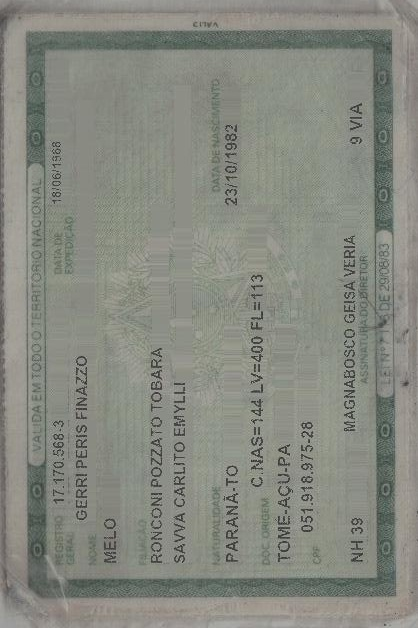

In [48]:
PIL.Image.open(str(listImages_dir[210]))


In [49]:
image = imread(str(listImages_dir[5]))
image.shape


(887, 1137, 3)

## Criando o conjunto de dados

In [119]:
data_dir = pathlib.Path("../BID_fomatter_2/")


In [120]:
batch_size = 32
img_height = 512
img_width = 512


In [121]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 16000 files belonging to 8 classes.
Using 12800 files for training.


In [122]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 16000 files belonging to 8 classes.
Using 3200 files for validation.


In [123]:
class_names = train_ds.class_names
print(class_names)


['CNH_Aberta', 'CNH_Frente', 'CNH_Verso', 'CPF_Frente', 'CPF_Verso', 'RG_Aberto', 'RG_Frente', 'RG_Verso']


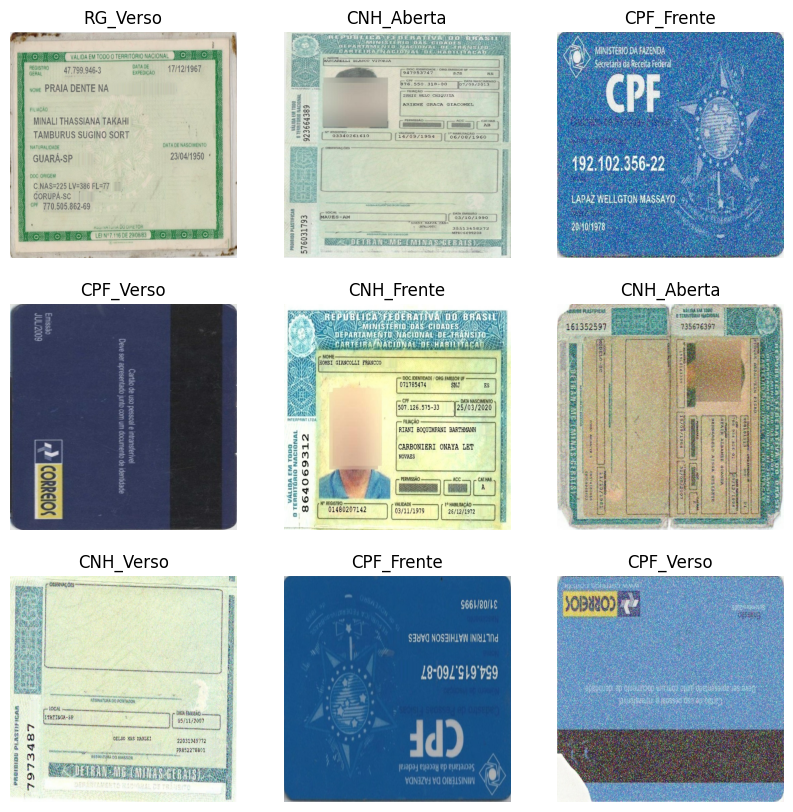

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [125]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 512, 512, 3)
(32,)


In [126]:
num_classes = 8

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])


In [127]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


In [128]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)


Epoch 1/3
115/400 [=======>......................] - ETA: 22:48 - loss: 0.5994 - accuracy: 0.8065

KeyboardInterrupt: 